In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np
import os
import gc
import matplotlib.pyplot as plt

In [3]:
import json, pdb
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
torch.cuda.set_device(0)

In [4]:
anno = pd.read_csv('/home/laskarisnik/data/GroundTruth2.csv')

In [5]:
anno.head()

,Image_id,x1,y1,label,x2,y2
0,adidas/000001.jpg,427.00000,284.000000,adidas,514.00000,365.000000
1,adidas/000002.jpg,290.00000,270.000000,adidas,376.00000,341.000000
2,adidas/000003.jpg,286.25000,47.500000,adidas,382.25000,115.000000
3,adidas/000004.jpg,554.20205,729.893851,adidas,605.17716,792.863104
4,adidas/000005.jpg,305.75000,325.000000,adidas,436.25000,466.000000


In [6]:
IM_ID, X1, Y1, LABEL, X2, Y2 = ['Image_id', 'x1', 'y1', 'label', 'x2', 'y2']

In [7]:
anno = anno[[IM_ID, X1, Y1, X2, Y2, LABEL]]

In [8]:
anno[LABEL][:5]

0    adidas
1    adidas
2    adidas
3    adidas
4    adidas
Name: label, dtype: object

In [9]:
anno[LABEL] = pd.Categorical(anno[LABEL])

In [10]:
anno['label_num'] = anno[LABEL].cat.codes

In [11]:
anno.head()

,Image_id,x1,y1,x2,y2,label,label_num
0,adidas/000001.jpg,427.00000,284.000000,514.00000,365.000000,adidas,1
1,adidas/000002.jpg,290.00000,270.000000,376.00000,341.000000,adidas,1
2,adidas/000003.jpg,286.25000,47.500000,382.25000,115.000000,adidas,1
3,adidas/000004.jpg,554.20205,729.893851,605.17716,792.863104,adidas,1
4,adidas/000005.jpg,305.75000,325.000000,436.25000,466.000000,adidas,1


In [12]:
LABEL_NUM = 'label_num'

In [13]:
trn_anno = collections.defaultdict(lambda:[])

In [14]:
trn_anno

defaultdict(<function __main__.<lambda>()>, {})

In [15]:
cats = dict((anno[LABEL_NUM][i], anno[LABEL][i]) for i in range(len(anno)))

In [16]:
len(anno)

7830

In [17]:
    for o in range(len(anno)):
    
        bb = np.array([int(anno[Y2][o]),
                       int(anno[X1][o]),
                       int(anno[Y1][o]),
                       int(anno[X2][o])])

        cat = anno[LABEL_NUM][o]

        trn_anno[anno[IM_ID][o]].append((bb, cat))

        
len(trn_anno)

7830

In [18]:
im_a = trn_anno[anno[IM_ID][0]]; im_a[0][-1]

1

In [19]:
trn_anno['adidas/000001.jpg']

[(array([365, 427, 284, 514]), 1)]

In [20]:
cats[7]

'chimay'

In [21]:
anno.iloc[0][LABEL]

'adidas'

In [22]:
os.chdir('../data/images/')

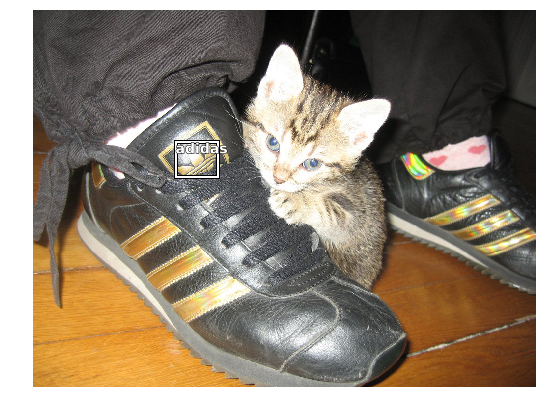

In [23]:
im = open_image(anno.iloc[1][IM_ID])
bbox = ImageBBox.create(*im.size, 
                        [trn_anno[anno.iloc[1][IM_ID]][0][0]],
                        labels = [0],
                        classes = [anno.iloc[1][LABEL]])
im.show(y=bbox, figsize=(9,9))

In [24]:
anno.sample().values[0]

array(['aldi/000276.jpg', 546.0000000000001, 335.9999999999999, 605.0000000000001, 415.99999999999983, 'aldi', 2],
      dtype=object)

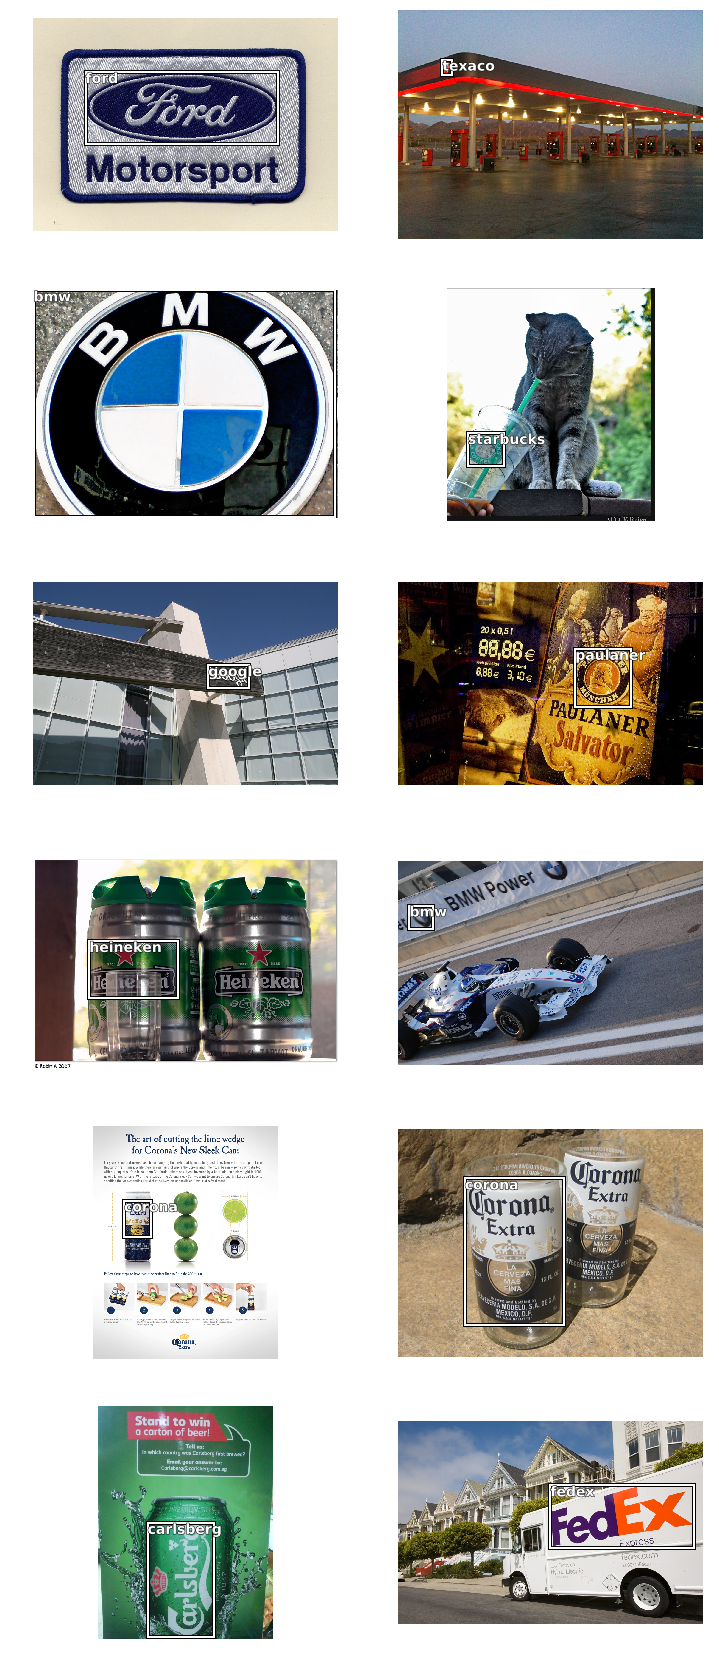

In [25]:
fig, axes = plt.subplots(6,2, figsize = (12,30))

for i, ax in enumerate(axes.flat):
    image = anno.sample().values[0]
    logo = image[0]
    label = image[5]
    im = open_image(logo)
    bbox = ImageBBox.create(*im.size, [trn_anno[logo][0][0]], labels=[0], classes=[label])
    im.show(y=bbox, ax=ax)
    

In [26]:
bb = np.array([trn_anno[anno.iloc[o][IM_ID]][0][0] for o in range(len(anno))])


In [27]:
#annotations = collections.defaultdict(list)
annotations = {}

In [28]:
anno[IM_ID][1]

'adidas/000002.jpg'

In [29]:
for o in range(len(anno)):
    bb = list([int(anno[Y2][o]),
                       int(anno[X1][o]),
                       int(anno[Y1][o]),
                       int(anno[X2][o])])

    cat = anno[LABEL][o]

    annotations[anno[IM_ID][o]] = [[bb], [cat]]
    
len(annotations)

7830

In [30]:
annotations

{'adidas/000001.jpg': [[[365, 427, 284, 514]], ['adidas']],
 'adidas/000002.jpg': [[[340, 290, 269, 376]], ['adidas']],
 'adidas/000003.jpg': [[[115, 286, 47, 382]], ['adidas']],
 'adidas/000004.jpg': [[[792, 554, 729, 605]], ['adidas']],
 'adidas/000005.jpg': [[[466, 305, 325, 436]], ['adidas']],
 'adidas/000006.jpg': [[[523, 118, 338, 191]], ['adidas']],
 'adidas/000007.jpg': [[[613, 535, 534, 613]], ['adidas']],
 'adidas/000008.jpg': [[[724, 657, 659, 748]], ['adidas']],
 'adidas/000009.jpg': [[[581, 630, 537, 665]], ['adidas']],
 'adidas/000010.jpg': [[[622, 614, 599, 639]], ['adidas']],
 'adidas/000011.jpg': [[[511, 624, 482, 657]], ['adidas']],
 'adidas/000012.jpg': [[[502, 464, 439, 522]], ['adidas']],
 'adidas/000013.jpg': [[[599, 709, 552, 752]], ['adidas']],
 'adidas/000014.jpg': [[[605, 387, 517, 482]], ['adidas']],
 'adidas/000015.jpg': [[[941, 1, 767, 116]], ['adidas']],
 'adidas/000016.jpg': [[[518, 901, 453, 981]], ['adidas']],
 'adidas/000017.jpg': [[[716, 386, 405, 577

In [31]:
str(Path('images/apple/000325.jpg').relative_to('images/'))

'apple/000325.jpg'

In [32]:
box, label = annotations[str(Path('images/apple/000325.jpg').relative_to('images/'))]

In [33]:
# def get_y_func(x):
#     if str(x.relative_to('images/')) in annotations:
#         # print(str(x.relative_to('images/')))
#         bboxes, classes = annotations[str(x.relative_to('images/'))]
#     return [bboxes, classes]

In [34]:
os.getcwd()

'/home/laskarisnik/data/images'

In [35]:
os.chdir('..')

In [36]:
path2fn = lambda path: re.search('\w*\/\w*\.jpg$', path).group(0)
get_y_func = lambda o: annotations[path2fn(o)]

In [37]:
get_y_func

<function __main__.<lambda>(o)>

In [38]:
def get_y_func(x):
    x = Path(x)
    bboxes, labels = annotations[str(x.relative_to('images/'))]
    return [bboxes * 2 , labels * 2] 

In [39]:
bboxes, labels = annotations['adidas/000010.jpg']

In [40]:
get_y_func('images/adidas/000010.jpg')

[[[622, 614, 599, 639], [622, 614, 599, 639]], ['adidas', 'adidas']]

In [41]:
def get_y_func_test(_):
    i = np.random.randint(4)
    bboxes = [[91.56, 51.14, 104.94, 63.68]] * (i + 1)
    categories = ['vase'] * (i + 1)
    return [bboxes, categories]

In [42]:
get_y_func_test('a')

[[[91.56, 51.14, 104.94, 63.68], [91.56, 51.14, 104.94, 63.68]],
 ['vase', 'vase']]

In [43]:
get_y_func

<function __main__.get_y_func(x)>

In [44]:
data = (ObjectItemList.from_df(pd.DataFrame(data=list(annotations.keys())), path = 'images/')
           .random_split_by_pct()
           .label_from_func(get_y_func)
           .transform(get_transforms(), tfm_y = True)
           .databunch(bs=16, collate_fn=bb_pad_collate))


You can deactivate this warning by passing `no_check=True`.


/opt/anaconda3/lib/python3.7/site-packages/fastai/basic_data.py:205: UserWarning: There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in [3961, 844, 4140, 212, 3491, 4590, 5097, 4640, 2959, 1742, 1485, 5566, 5715, 4202, 149, 5962]
  warn(f"There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in {idx}")


In [45]:
data.show_batch(rows=3)

TypeError: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 544, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 94, in __getitem__
    if isinstance(idxs, numbers.Integral): return self.get(idxs)
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/vision/data.py", line 349, in get
    return ImageBBox.create(*_get_size(self.x,i), *self.items[i], classes=self.classes, pad_idx=self.pad_idx)
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/vision/image.py", line 337, in create
    bboxes = tensor(bboxes).float()
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/torch_core.py", line 70, in tensor
    res = torch.tensor(x) if is_listy(x) else as_tensor(x)
TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: double, float, float16, int64, int32, and uint8.


In [40]:
bboxes, label = annotations['adidas/000001.jpg']

In [43]:
type(label[0])

str

In [41]:
tensor(bboxes).float()

tensor([[365., 427., 284., 514.]])

In [44]:
bboxes = tensor(bboxes).float()

In [45]:
re.search('\w*\/\w*.jpg$', 'data/images/adidas/000001.jpg').group(0)

'adidas/000001.jpg'

In [48]:
import pdb

In [49]:
os.getcwd()

'/home/laskarisnik/data'

In [71]:
data = (ObjectItemList.from_df(pd.DataFrame(data=list(annotations.keys())), path = 'images/'))

In [72]:
data

ObjectItemList (7830 items)
[Image (3, 683, 1024), Image (3, 768, 1024), Image (3, 1024, 768), Image (3, 1024, 911), Image (3, 1024, 768)]...
Path: images

In [73]:
split = data.random_split_by_pct(0.2)

In [74]:
split

ItemLists;

Train: ObjectItemList (6264 items)
[Image (3, 683, 1024), Image (3, 1024, 768), Image (3, 1024, 911), Image (3, 1024, 768), Image (3, 768, 1024)]...
Path: images;

Valid: ObjectItemList (1566 items)
[Image (3, 829, 1024), Image (3, 1024, 768), Image (3, 683, 1024), Image (3, 600, 800), Image (3, 532, 800)]...
Path: images;

Test: None

In [75]:
lbl = split.label_from_func(get_y_func)

AttributeError: 'numpy.str_' object has no attribute 'relative_to'

In [56]:
lbl

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: double, float, float16, int64, int32, and uint8.

In [58]:
lbl

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: double, float, float16, int64, int32, and uint8.

In [52]:
tfm = lbl.transform(get_transforms(), tfm_y = True, size=224)

In [55]:
bnch = tfm.databunch(bs=64, collate_fn=bb_pad_collate)

You can deactivate this warning by passing `no_check=True`.


/opt/anaconda3/lib/python3.7/site-packages/fastai/basic_data.py:205: UserWarning: There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in [1489, 1865, 3443, 298, 2335, 4689, 13, 4555, 4789, 4163, 5924, 3685, 1332, 175, 6180, 5822, 3391, 4356, 5619, 3959, 1324, 2186, 3714, 5776, 4204, 3227, 3347, 581, 5494, 899, 3169, 4271, 3861, 6091, 5595, 1811, 5208, 5719, 4762, 4158, 4055, 5967, 3067, 1996, 3735, 513, 1022, 386, 3160, 3208, 5901, 1192, 1390, 4980, 6212, 2108, 2548, 2216, 4328, 4539, 1197, 5568, 6215, 3560]
  warn(f"There seems to be something wrong with your dataset, can't access self.train_ds[i] for all i in {idx}")


In [ ]:
bunch_norm = bunch.normalize(imagenet_stats)

In [ ]:
bunch_norm.train_ds[0]

In [ ]:
data = (ObjectCategoryList.from_df(pd.DataFrame(data=list(annotations.keys())), path = 'images/')
           .random_split_by_pct()
           .label_from_func(get_y_func_x)
           .transform(get_transforms(), tfm_y = True, size=224)
           .databunch(bs=64, collate_fn=bb_pad_collate)
           .normalize(imagenet_stats))

In [ ]:
%%time
data.show_batch()

In [ ]:
df = pd.DataFrame({'fn': [anno.iloc[o][IM_ID] for o in range(len(anno))], 
                   'bbox': bbs}, columns=['fn','bbox'])


In [ ]:
df.head(5)

In [ ]:
#df.to_csv('tmp/bbox.csv', index=False)

In [ ]:
os.getcwd()

In [ ]:
tfms = get_transforms()

In [ ]:
df.head()

In [ ]:
md = (ImageImageList.from_df(df, 'images/')
                .random_split_by_pct(0.0)
                .label_from_df()
                .transform(tfms)
                .databunch())

In [ ]:
anno.iloc[0][IM_ID]

In [ ]:
df = pd.DataFrame({'fn': [anno.iloc[o][IM_ID] for o in range(len(anno))],
                  'label': [anno.iloc[o][LABEL] for o in range(len(anno))],
                  'bbox': [' '.join(str(p) for p in trn_anno[anno.iloc[o][IM_ID]][0][0]) for o in range(len(anno))]})



In [ ]:
df.to_csv('labels.csv', index = False)

In [ ]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(PATH, ds_tfms=tfms, valid_pct=0.2, size=224)

In [ ]:
data.show_batch(rows=3)

In [ ]:
# Databunch for classifier
data = (ImageItemList.from_folder('data/images/') #Where to find the data? -> in path and its subfolders  
        .random_split_by_pct(valid_pct = 0.2)  #How to split in train/valid? -> use the folders
        .label_from_folder()                  #How to label? -> depending on the folder of the filenames
        # .add_test()                    #Optionally add a test set (here default name is test)
        .transform(tfms, size=224)                      #Data augmentation? -> use tfms with a size of 64
        .databunch())

In [ ]:
annot_dict = pd.read_csv('data/tmp/labels.csv')

In [ ]:
annot_dict.head()